# Logistic Regression with a Neural Network mindset

Welcome to the programming assignment related to Logistic Regression!
You will build a logistic regression forecasting model to estimate the temperature of wastewater at the entrance of Wastewater Treatment Plant (WWTP). This assignment will step you through how to do this with a Neural Network mindset, and will also hone your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.
- Use `np.dot(X,Y)` to calculate dot products.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## Important Note on answering the questions on CANVAS:

In order to answer the questions correctly, you only need to write the codes in places which are specified as:
```python

# YOUR CODE STARTS HERE

YOUR CODE

# YOUR CODE ENDS HERE
```

You shouldn't change other lines of code. However, you can always make a copy of the file and investigate other lines.

## Table of Contents
- [1 - Packages](#1)
- [2 - Overview of the Problem set](#2)
- [3 - Normalization](#3)
     - [Exercise 1](#ex-1)
- [4 - General Architecture of the learning algorithm](#4)
- [5 - Building the parts of our algorithm](#5)
    - [5.1 - Helper functions](#5-1)
        - [Exercise 2 - sigmoid](#ex-2)
    - [5.2 - Initializing parameters](#5-2)
        - [Exercise 3 - initialize_with_zeros](#ex-3)
    - [5.3 - Forward and Backward propagation](#5-3)
        - [Exercise 4 - propagate](#ex-4)
    - [5.4 - Optimization](#5-4)
        - [Exercise 5 - optimize](#ex-5)
        - [Exercise 6 - predict](#ex-6)
- [6 - Merge all functions into a model](#6)
    - [Exercise 7 - model](#ex-7)
- [7 - Result analysis](#7)
- [8 - References](#8)

<a name='1'></a>
## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](https://numpy.org/doc/1.20/) is the fundamental package for scientific computing with Python.
- [pandas](https://www.w3schools.com/python/pandas/pandas_intro.asp#:~:text=What%20is%20Pandas%3F,by%20Wes%20McKinney%20in%202008.) used for working with data sets.
- [sklearn](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [1]:
# Package imports
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from public_tests import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

<a name='2'></a>
## 2 - Overview of the Problem set ##

**Problem Statement**: The main problem to be solved is to find the relationship between the temperature of wastewater at the entrance of Wastewater Treatment Plant (WWTP) as output and some input parameters as ambient temperature, buildings effluent temperature, buildings effluent flowrate, storm water flowrate, infilteration flowrate, hour of  day, and hour of year, as can be seen in the following figure.  
You are given a dataset ("Input for ANN_10year​.xlsx") containing the hourly value of all 8 parameters for years 2009-2018. 

You will build a forecasting algorithm that can correctly forecast wastewater temperature at the entrance of WWTP for 2019.The forecasted values will be compraed with measured values from "Input for ANN​.xlsx"

Let's get more familiar with the dataset. Load the data by running the following code.

![Inputs and output data](Images/InOut.png)


In [3]:
# Loading the data 
# Loading the data 
input_data = pd.read_excel("Input for ANN_10year.xlsx")
input_data_2019 = pd.read_excel("Input for ANN.xlsx")
input_data = input_data.values   # .values converts a pandas dataframe to a numpy array 
input_data_2019 = input_data_2019.values

We should categorize the historical data into inputs (x) and outputs (y) features as well as training set and testing set. 

All parameters on the left side of previous figure are input parameters and are shown with x. The parameter on the right hand side of the figure, is the output and is shown with y. 

Data from 2009 to 2018 will be used as training sets. Data for 2019 will be used for testing. 

Note:
We add "_orig" at the end of data to show they are original data.

In [4]:
#Categorizing the data into inputs (x) and outputs (y) as well as training set and testing set
train_set_x_orig = input_data[:87600,1:8]
test_set_x_orig = input_data_2019[:8760,1:8]
train_set_y_orig = input_data[:87600,-1:]
test_set_y_orig = input_data_2019[:8760,-1:]

<a name='3'></a>
## 3 - Normalization ##

**Normalization** is an important step in data science. Normalization refers to the process of scaling data to a standard range, typically between 0 and 1 or -1 and 1. 

Normalization is important for the following reasons:

Improved convergence: Normalizing data helps the optimization algorithm converge faster during the training process. It prevents certain features from dominating the learning process due to their larger scales, leading to more balanced and efficient training.

Mitigating numerical instability: Training algorithms like Logistic Regression can be sensitive to the scale of input features. Large differences in scale can cause numerical instability and difficulties in optimization. 

Generalization: Normalization helps the network generalize well to unseen data. When the data is normalized, the network becomes less sensitive to variations in absolute values and focuses on learning meaningful patterns and relationships in the data.

There are different types of normalization techniques, such as min-max normalization, z-score normalization, and feature scaling. The specific choice of normalization technique depends on the characteristics of the data and the requirements of the architecture. You can find more detailed info [here](https://medium.com/@mkc940/different-normalization-methods-a1be71fe9f1).

Python has differnt libraries for normalization. In this course, we use [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from liberary sklearn.preprocessing.

In [5]:
#Normalization process
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_set_x_normalized = scaler.fit_transform(train_set_x_orig)
test_set_x_normalized = scaler.fit_transform(test_set_x_orig)
train_set_y_normalized = scaler.fit_transform(train_set_y_orig)
test_set_y_normalized = scaler.fit_transform(test_set_y_orig)

#Transpose the data to put all features in the rows and all samples in the columns
train_set_x_normalized = train_set_x_normalized.T     # .T Transpose a numpy array  
test_set_x_normalized = test_set_x_normalized.T
train_set_y_normalized = train_set_y_normalized.T
test_set_y_normalized = test_set_y_normalized.T


<a name='ex-1'></a>
### Exercise 1
Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [6]:
#(≈ 2 lines of code)
# m_train = 
# m_test =  
# YOUR CODE STARTS HERE
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x_normalized.shape))
print ("train_set_y shape: " + str(train_set_y_normalized.shape))
print ("test_set_x shape: " + str(test_set_x_normalized.shape))
print ("test_set_y shape: " + str(test_set_y_normalized.shape))

Number of training examples: m_train = 87600
Number of testing examples: m_test = 8760
train_set_x shape: (7, 87600)
train_set_y shape: (1, 87600)
test_set_x shape: (7, 8760)
test_set_y shape: (1, 8760)


<font color='yellow'>
    
    
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Categorize your data into input and output features as well as training and testing sets
- "Standardize" the data by normalization
- Figure out the dimensions and shapes of the problem (m_train, m_test, ...)

<a name='4'></a>
## 4 - General Architecture of the Learning Algorithm ##

It's time to design a simple forecasting algorithm.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="Images/General Architecture.png" style="width:800px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:

$$
z^{(i)} = w^T x^{(i)} + b \tag{1}
$$

$$
\hat{y}^{(i)} = a^{(i)} = \sigma(z^{(i)}) \tag{2}
$$

$$
\mathcal{L}(a^{(i)}, y^{(i)}) = - y^{(i)} \log(a^{(i)}) - (1-y^{(i)}) \log(1-a^{(i)}) \tag{3}
$$

The cost is then computed by summing over all training examples:

$$
J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)}) \tag{4}
$$

**Key steps**:
In this exercise, you will carry out the following steps:  
- Initialize the parameters of the model  
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)  
- Analyse the results and conclude

<a name='5'></a>
## 5 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

<a name='5-1'></a>
### 5.1 - Helper functions

<a name='ex-2'></a>
### Exercise 2 - sigmoid
Implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Use np.exp().

In [7]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    
    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s = 1/(1+np.exp(-z))
    # YOUR CODE ENDS HERE
    
    return s

In [8]:
print ("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


<a name='5-2'></a>
### 5.2 - Initializing parameters

<a name='ex-3'></a>
### Exercise 3 - initialize_with_zeros
Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [13]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((dim,1))
    b = 0.0
    # YOUR CODE ENDS HERE

    return w, b

In [14]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


<a name='5-3'></a>
### 5.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

<a name='ex-4'></a>
### Exercise 4 - propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{6}$$

In [15]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """

    Arguments:
    w -- weights, a numpy array of size (number of samples, 1)
    b -- bias, a scalar
    X -- Input data of size (number of samples, number of parameters)
    Y -- out put data or Target

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication. 
    # And don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE 
    A = sigmoid(np.dot(w.T,X) + b)   # w.T is (1,number of samples), X is (number of samples, number of parameters)
    cost = -1/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw = 1/m * np.dot(X,(A-Y).T)   # dw is (number of samples,1)
    db = 1/m * np.sum(A-Y)          # db is a scalar
    # YOUR CODE ENDS HERE
    
    cost = np.squeeze(np.array(cost))
    #For example, let's say you have a 2D NumPy array with shape (3,1). 
    #If you use np.squeeze on this array, it will remove the second dimension 
    #with size 1 and return a 1D array with shape (3,).
    
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [16]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405


<a name='5-4'></a>
### 5.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

<a name='ex-5'></a>
### Exercise 5 - optimize
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [17]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=2000, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (number of samples, 1)
    b -- bias, a scalar
    X -- data of size (number of samples, number of parameters)
    Y -- Target
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    # A deep copy means that the new object is completely independent of the original object, 
    # and any changes made to the new object will not affect the original object.
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w = w - learning_rate * dw
        b = b - learning_rate * db
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
                
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [18]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])

params, grads, costs = optimize(w, b, X, Y, num_iterations=2000, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

w = [[-0.08896673]
 [ 2.35945288]]
b = 2.033627396755125
dw = [[ 0.02022468]
 [-0.01021726]]
db = -0.00944359761774766
Costs = [array(0.15900538), array(0.10541138), array(0.07681337), array(0.05976109), array(0.04867359), array(0.04097783), array(0.03536348), array(0.03110563), array(0.02777532), array(0.02510443), array(0.02291761), array(0.02109579), array(0.01955551), array(0.01823664), array(0.01709487), array(0.01609682), array(0.01521696), array(0.01443539), array(0.01373641), array(0.01310749)]


<a name='ex-6'></a>
### Exercise 6 - predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function by:

Calculate $\hat{Y} = A = \sigma(w^T X + b)$



In [19]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    """"
    Arguments:
    w -- weights, a numpy array of size (number of input parameters, 1)
    b -- bias, a scalar
    X -- data of size (number of samples, number of parameters)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions for the examples in X
    """
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T,X) + b)   # w.T is (1,number of samples), X is (number of samples, number of parameters)
    # YOUR CODE ENDS HERE
        
        
    for i in range(A.shape[1]):
        
        Y_prediction[0,i] = A[0, i]
                
           
    return Y_prediction
    

In [20]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[0.52241976 0.50960677 0.34597965]]


<font color='yellow'>
    
**What to remember:**
    
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - Computing the cost and its gradient 
    - Updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

<a name='6'></a>
## 6 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

<a name='ex-7'></a>
### Exercise 7 - model
Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - parameters, grads, costs for the outputs of optimize()

In [21]:
# GRADED FUNCTION: model

def model(train_set_x_normalized, train_set_y_normalized , test_set_x_normalized, test_set_y_normalized, num_iterations=10000, learning_rate=.85, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    train_set_x_normalized -- training set represented by a numpy array
    train_set_y_normalized -- training labels represented by a numpy array (vector)
    test_set_x_normalized -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)   
    # initialize parameters with zeros 
    # w, b = ...
    dim = train_set_x_normalized.shape[0]
    # YOUR CODE STARTS HERE
    w,b = initialize_with_zeros(dim)
    # YOUR CODE ENDS HERE    

    #(≈ 1 line of code)
    # Gradient descent 
    # params, grads, costs = ...
    X = train_set_x_normalized
    Y = train_set_y_normalized
    # YOUR CODE STARTS HERE
    params, grads, costs = optimize(w, b, X, Y, num_iterations, learning_rate, print_cost)
    # YOUR CODE ENDS HERE   
    
        
    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...
    w=params["w"]
    b=params["b"]

    
    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # YOUR CODE STARTS HERE
    Y_prediction_test = predict(w, b, test_set_x_normalized)
    Y_prediction_train = predict(w, b, train_set_x_normalized)
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        #print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_set_y_normalized)) * 100))
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_set_y_normalized)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_set_y_normalized)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [22]:
from public_tests import *

model_test(model)

All tests passed!


In [23]:
logistic_regression_model = model(train_set_x_normalized, train_set_y_normalized, test_set_x_normalized, test_set_y_normalized, num_iterations=1000, learning_rate=.85, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.615158
Cost after iteration 200: 0.611436
Cost after iteration 300: 0.609852
Cost after iteration 400: 0.609091
Cost after iteration 500: 0.608718
Cost after iteration 600: 0.608533
Cost after iteration 700: 0.608441
Cost after iteration 800: 0.608395
Cost after iteration 900: 0.608372
train accuracy: 92.62700424473724 %
test accuracy: 90.0051994682858 %


Let's also plot the cost function and the gradients.

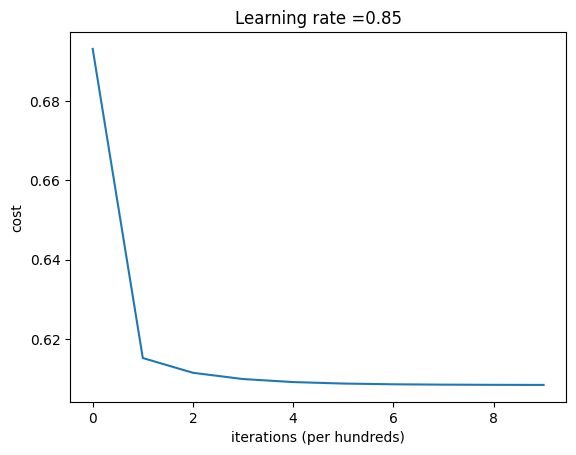

In [24]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

In the next cell, we denormalize the prediced values of test data set and compare with real values. 

In [25]:
#Reverse normalization
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reverse the normalization to get the original data
Y_prediction_test_real_scale = scaler.inverse_transform(logistic_regression_model["Y_prediction_test"])



<a name='7'></a>
##  7 - Results Analysis

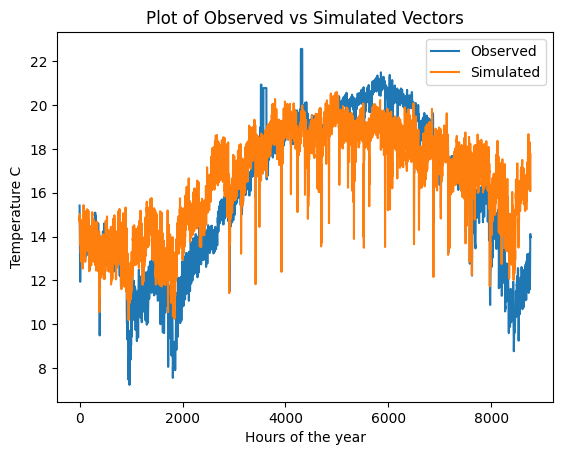

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define the two vectors
1758
x = np.arange(0,8760, 1)
y1 = test_set_y_orig
y2 = Y_prediction_test_real_scale.T


# Plot the vectors
plt.plot(x, y1, label='Observed')
plt.plot(x, y2, label='Simulated')

# Add a title and labels for the x and y axes
plt.title('Plot of Observed vs Simulated Vectors')
plt.xlabel('Hours of the year')
plt.ylabel('Temperature C')

# Set the y-axis limits
plt.ylim()

# Add a legend
plt.legend()

# Display the plot
plt.show()

<font color='yellow'>
    
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

<a name='8'></a>
##  8 - References
- Speech and Language Processing. Daniel Jurafsky & James H. Martin. Draft of January 7, 2023.Chapter 5, Logistic Regression
- https://www.deeplearning.ai/
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/